# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Import visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
fraud.shape

(1000000, 8)

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


### **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?


In [5]:
fraud["fraud"] = fraud["fraud"].astype(int)

In [6]:
fraud["fraud"].value_counts(normalize=True)*100

fraud
0    91.2597
1     8.7403
Name: proportion, dtype: float64

<Axes: xlabel='fraud'>

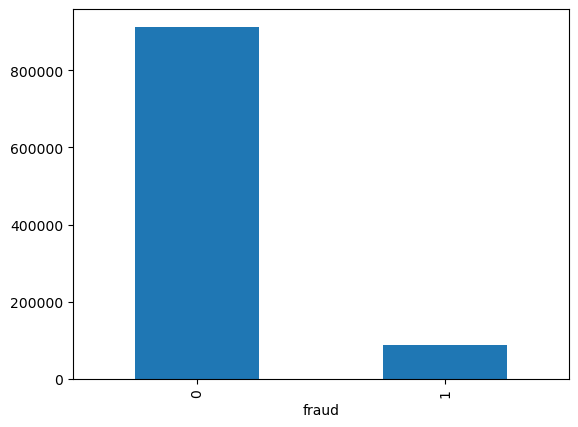

In [7]:
target_dist = fraud["fraud"].value_counts()
target_dist.plot(kind = 'bar')

- We are dealing with an  **Unbalance** dataset : There are more 0 (legit) than 1  (fraud)

Target distribution:
 fraud
0    0.912597
1    0.087403
Name: proportion, dtype: float64


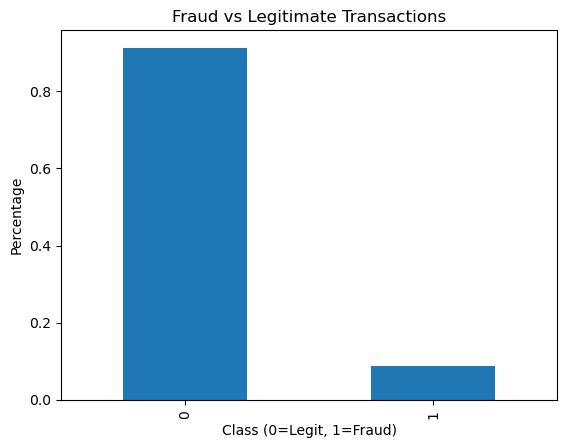

In [8]:
# Check target variable distribution
target_dist = fraud['fraud'].value_counts(normalize=True)
print("Target distribution:\n", target_dist)

# Visualize
import matplotlib.pyplot as plt
target_dist.plot(kind='bar')
plt.title('Fraud vs Legitimate Transactions')
plt.xlabel('Class (0=Legit, 1=Fraud)')
plt.ylabel('Percentage')
plt.show()

**Steps:**

### **2.** Train a LogisticRegression.


In [9]:
from sklearn.linear_model import LogisticRegression


In [10]:
X = fraud.drop(columns=["fraud"])

y = fraud["fraud"]

In [11]:
from sklearn.preprocessing import StandardScaler  

# Scale only numerical columns (skip binary)
num_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

scaler = StandardScaler()           # Create a scaler object

X[num_cols] = scaler.fit_transform(X[num_cols])        # Fit to data and transform 

In [12]:
display(X.describe().round(2))  # Mean ≈ 0, Std ≈ 1  


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.0,1000000.00
mean,-0.00,-0.00,-0.00,0.88,0.35,0.1,0.65
std,1.00,1.00,1.00,0.32,0.48,0.3,0.48
min,-0.41,-0.19,-0.65,0.00,0.00,0.0,0.00
25%,-0.35,-0.18,-0.48,1.00,0.00,0.0,0.00
50%,-0.25,-0.16,-0.30,1.00,0.00,0.0,1.00
75%,-0.01,-0.07,0.10,1.00,1.00,0.0,1.00
max,162.20,458.38,95.01,1.00,1.00,1.0,1.00


In [13]:
# Binary columns remain unchanged
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
lm = LogisticRegression(max_iter=1000)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

### **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.


In [15]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, classification_report

print("Logistic accuracy score train: {:6.4f}".format(lm.score(X_train,y_train)))
print("Logistic accuracy score test: {:6.4f}\n".format(lm.score(X_test,y_test)))

print("precision (basic model): ", precision_score(y_test, y_pred))
print("recall    (basic model): ", recall_score(y_test, y_pred))
print("f1        (basic model): ", f1_score(y_test, y_pred))


Logistic accuracy score train: 0.9590
Logistic accuracy score test: 0.9585

precision (basic model):  0.8886677659634957
recall    (basic model):  0.5981476520341383
f1        (basic model):  0.715024247415134


In [16]:
############Import Confusion Matrix from SkLearn
from sklearn.metrics import confusion_matrix
####################################################
print("Logistic Regression confusion matrix: \n\n", confusion_matrix(y_test, y_pred))

Logistic Regression confusion matrix: 

 [[271913   1958]
 [ 10500  15629]]


Confusion Matrix:
[[271913   1958]
 [ 10500  15629]]


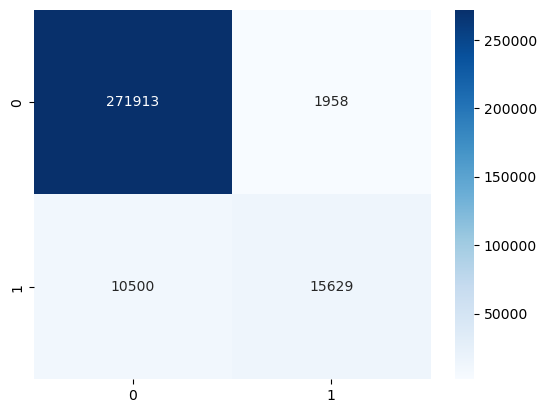

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

Text(63.53777777777783, 0.5, 'actual')

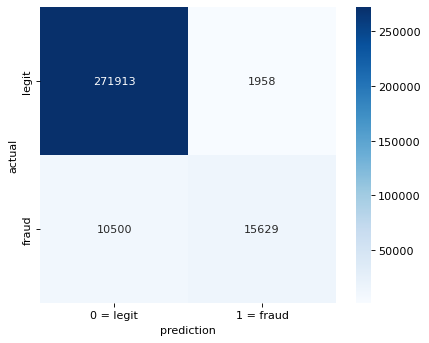

In [18]:
plt.figure(dpi=80)
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
        xticklabels=['0 = legit', '1 = fraud'],
        yticklabels=['legit', 'fraud'])
plt.xlabel('prediction')
plt.ylabel('actual')

### **4.** Run **Oversample** in order to balance our target variable
 
 and repeat the steps above, now with balanced data. Does it improve the performance of our model? 


In [19]:
from sklearn.utils import resample

In [20]:
# our test set still must reflect reality!
train = pd.concat([X_train, y_train],axis=1)
display(train.shape)
train.head()

(700000, 8)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
506532,-0.242599,-0.137685,-0.576500,1.0,0.0,0.0,0.0,0
327991,-0.362928,-0.191469,1.248963,1.0,0.0,0.0,1.0,1
715937,-0.351508,-0.179028,0.044170,1.0,0.0,0.0,1.0,0
860726,-0.208932,0.124909,-0.595091,1.0,1.0,0.0,1.0,0
78617,-0.326121,-0.133889,-0.533174,1.0,0.0,0.0,0.0,0


In [21]:
# separate majority/minority classes
legit = train[train['fraud']==0]
fraud = train[train['fraud']==1]

In [22]:
display(legit.shape)
display(fraud.shape)

(638726, 8)

(61274, 8)

In [23]:
# oversample minority
fraud_oversampled = resample(fraud, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(legit),#<- make both sets the same size
                                    random_state=0)

In [24]:
# both sets are now of a reasonable size
display(legit.shape)
display(fraud_oversampled.shape)

(638726, 8)

(638726, 8)

In [25]:
train_oversampled = pd.concat([legit,fraud_oversampled])
train_oversampled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
506532,-0.242599,-0.137685,-0.576500,1.0,0.0,0.0,0.0,0
715937,-0.351508,-0.179028,0.044170,1.0,0.0,0.0,1.0,0
860726,-0.208932,0.124909,-0.595091,1.0,1.0,0.0,1.0,0
78617,-0.326121,-0.133889,-0.533174,1.0,0.0,0.0,0.0,0
394612,-0.045907,-0.180811,-0.351939,1.0,0.0,0.0,1.0,0


In [26]:
y_train_over = train_oversampled['fraud'].copy()
X_train_over = train_oversampled.drop('fraud',axis = 1).copy()

In [27]:
lm = LogisticRegression(max_iter=1000)
lm.fit(X_train_over, y_train_over)
y_pred = lm.predict(X_test)

In [28]:
print("OVERSAMPLE:")

print("Logistic accuracy score train: {:6.4f}".format(lm.score(X_train_over,y_train_over)))
print("Logistic accuracy score test: {:6.4f}\n".format(lm.score(X_test,y_test)))

print("precision (oversample): ", precision_score(y_test, y_pred))
print("recall    (oversample): ", recall_score(y_test, y_pred))
print("f1        (oversample): ", f1_score(y_test, y_pred))

OVERSAMPLE:
Logistic accuracy score train: 0.9410
Logistic accuracy score test: 0.9342

precision (oversample):  0.5737746569963506
recall    (oversample):  0.9507061119828543
f1        (oversample):  0.7156417901848091


### **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?


In [29]:
# separate majority/minority classes
legit = train[train['fraud']==0]
fraud = train[train['fraud']==1]

In [30]:
display(legit.shape)
display(fraud.shape)

(638726, 8)

(61274, 8)

In [31]:
# oversample minority
legit_undersampled = resample(legit, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(fraud),#<- make both sets the same size
                                    random_state=0)

In [32]:
# both sets are now of a reasonable size
display(legit_undersampled.shape)
display(fraud.shape)

(61274, 8)

(61274, 8)

In [33]:
train_undersampled = pd.concat([legit_undersampled, fraud])
train_undersampled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
980018,-0.132186,-0.128326,-0.500043,1.0,1.0,0.0,0.0,0
23782,0.463083,-0.174750,-0.617662,1.0,0.0,0.0,1.0,0
729794,-0.311652,-0.173681,0.272067,1.0,0.0,0.0,0.0,0
161685,0.257255,-0.177147,-0.237112,1.0,1.0,1.0,1.0,0
486177,0.073235,-0.143916,-0.102697,1.0,1.0,0.0,1.0,0


In [34]:
y_train_under = train_undersampled['fraud'].copy()
X_train_under = train_undersampled.drop('fraud',axis = 1).copy()

In [35]:
lm = LogisticRegression(max_iter=1000)
lm.fit(X_train_under, y_train_under)
y_pred = lm.predict(X_test)

In [36]:
print("UNDERSAMPLE:")

print("Logistic accuracy score train: {:6.4f}".format(lm.score(X_train_under,y_train_under)))
print("Logistic accuracy score test: {:6.4f}\n".format(lm.score(X_test,y_test)))

print("precision (undersample): ", precision_score(y_test, y_pred))
print("recall    (undersample): ", recall_score(y_test, y_pred))
print("f1        (undersample): ", f1_score(y_test, y_pred))

UNDERSAMPLE:
Logistic accuracy score train: 0.9411
Logistic accuracy score test: 0.9349

precision (undersample):  0.5764108037868944
recall    (undersample):  0.9507061119828543
f1        (undersample):  0.7176886962802456


### **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [37]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 123,sampling_strategy=1.0)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [38]:
X_train_SMOTE

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.242599,-0.137685,-0.576500,1.0,0.0,0.0,0.0
1,-0.362928,-0.191469,1.248963,1.0,0.0,0.0,1.0
2,-0.351508,-0.179028,0.044170,1.0,0.0,0.0,1.0
3,-0.208932,0.124909,-0.595091,1.0,1.0,0.0,1.0
4,-0.326121,-0.133889,-0.533174,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1277447,3.173131,-0.049506,-0.353265,1.0,0.0,0.0,1.0
1277448,-0.203782,-0.121356,2.388064,1.0,0.0,0.0,1.0
1277449,-0.309291,-0.172418,4.027285,1.0,0.0,0.0,1.0
1277450,1.816147,-0.172211,-0.565855,1.0,0.0,0.0,1.0


In [39]:
y_train_SMOTE

0          0
1          1
2          0
3          0
4          0
          ..
1277447    1
1277448    1
1277449    1
1277450    1
1277451    1
Name: fraud, Length: 1277452, dtype: int64

<Axes: xlabel='fraud'>

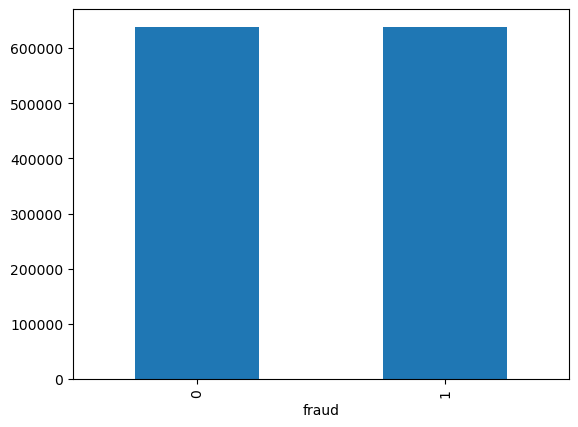

In [40]:
SMOTE_classes = y_train_SMOTE.value_counts()
SMOTE_classes.plot(kind = 'bar')

In [41]:
# from sklearn.linear_model import LogisticRegression

lm_SMOTE = LogisticRegression(max_iter=1000)
lm_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)


LogisticRegression(max_iter=1000)

In [42]:
y_pred_SMOTE = lm_SMOTE.predict(X_test)

In [43]:
# Evaluate the model
lm_SMOTE_score_train = lm_SMOTE.score(X_train_SMOTE,y_train_SMOTE)
lm_SMOTE_score_test = lm_SMOTE.score(X_test,y_test)

print(f"Logistic accuracy train score with SMOTE Resampling: {lm_SMOTE_score_train:.4f}")
print(f"Logistic accuracy train score with SMOTE Resampling: {lm_SMOTE_score_test:.4f}")

Logistic accuracy train score with SMOTE Resampling: 0.9412
Logistic accuracy train score with SMOTE Resampling: 0.9342


In [44]:
print("precision SMOTE Resampling: ", precision_score(y_test, y_pred_SMOTE))
print("recall    SMOTE Resampling: ", recall_score(y_test, y_pred_SMOTE))
print("f1        SMOTE Resampling: ", f1_score(y_test, y_pred_SMOTE))

precision SMOTE Resampling:  0.5738927631275113
recall    SMOTE Resampling:  0.951165371809101
f1        SMOTE Resampling:  0.715863757471016


Confusion Matrix:
[[255418  18453]
 [  1276  24853]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96    273871
           1       0.57      0.95      0.72     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



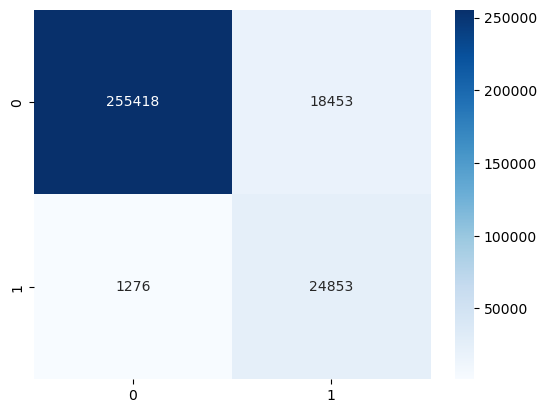

In [45]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_SMOTE)
print("Confusion Matrix:")
print(cm)

# Full classification report (includes precision/recall/F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_SMOTE))

# Visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()